In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(open("C:/Users/andre/Desktop/Titanic/train.csv",'rb'))
test_X = pd.read_csv(open("C:/Users/andre/Desktop/Titanic/test.csv",'rb'))
test_Y = pd.read_csv(open("C:/Users/andre/Desktop/Titanic/gender_submission.csv",'rb'))

df.head(100)

df.set_index("PassengerId")



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
#controllo dei valori nulli
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#creazione di una 
max= df["PassengerId"].max()
print(max)


891


count0=0
count1=0

for i in range(max):
    if df["survived"][i] == 0:
        count0 += 1
    elif df["Survived"][i] == 1:
        count1 +=1
print(count0)
print(count1)

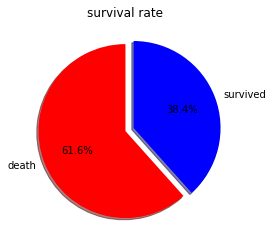

In [5]:
#Analizziamo quanti sono i sopravvissuti in percentuale
meaning=("death","survived" )
cols = ['r','b']

plt.pie(df.groupby("Survived").Survived.count(),
        labels=meaning,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%1.1f%%')

plt.title('survival rate')
plt.show()

In [6]:
#Notiamo che il tasso di sopravvivenza è quasi uno su tre, abbastanza prevedibile per un disastro di tale portata
#il dataframe è perfettamente in linea con il tasso di sopravvivenza genereale in cui si contano 700 sopravvissuti su 2223

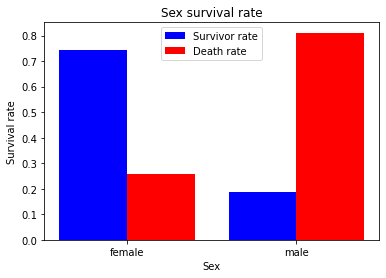

In [7]:
#analizziamo se c'è una correlazione tra il sesso di appartenenza e le probabilità di sopravvivenza
labels = ["female","male"]
rate_death_mf = 1-(df.groupby("Sex").Survived.mean())
rate_surv_mf = (df.groupby("Sex").Survived.mean())

x = np.arange(len(labels))  # the label locations
width = 0.40 # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x-width/2,rate_surv_mf , width, label='Survivor rate',color='b')
rects2 = ax.bar(x+width/2,rate_death_mf , width, label='Death rate',color='r')



ax.set_ylabel('Survival rate')
ax.set_xlabel("Sex")
ax.set_title('Sex survival rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [8]:
#Le donne sono sopravvisute maggiormente
#Sembrerebbe che il detto prima le donne e i bambini sia parzialmente vero
#verifichiamo se anche per i bambini è così...

In [9]:
#creiamo due dataframe divisi per sesso
male_df= df[["Age","Sex","Survived", "PassengerId"]]
female_df= df[["Age","Sex","Survived", "PassengerId"]]


for i in range(max):
    if (male_df["Sex"][i]=="male"):
        female_df = female_df.drop(i)
    elif (female_df["Sex"][i]=="female"):
        male_df= male_df.drop(i)
#eliminiamo i valori nulli per fare un analisi      
male_df=male_df.dropna()
female_df=female_df.dropna()

In [10]:
#creiamo una nuova variabile Age group per raggruppare le persone per fascia di età decennale
bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','10-20','20-30','30-40','40-50', "50-60","60-70","70-80"]
male_df['AgeGroup'] = pd.cut(male_df['Age'], bins=bins, labels=labels, right=False)
print (male_df)

bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','10-20','20-30','30-40','40-50', "50-60","60-70","70-80"]
female_df['AgeGroup'] = pd.cut(female_df['Age'], bins=bins, labels=labels, right=False)
print (female_df)


      Age   Sex  Survived  PassengerId AgeGroup
0    22.0  male         0            1    20-30
4    35.0  male         0            5    30-40
6    54.0  male         0            7    50-60
7     2.0  male         0            8     0-10
12   20.0  male         0           13    20-30
..    ...   ...       ...          ...      ...
883  28.0  male         0          884    20-30
884  25.0  male         0          885    20-30
886  27.0  male         0          887    20-30
889  26.0  male         1          890    20-30
890  32.0  male         0          891    30-40

[453 rows x 5 columns]
      Age     Sex  Survived  PassengerId AgeGroup
1    38.0  female         1            2    30-40
2    26.0  female         1            3    20-30
3    35.0  female         1            4    30-40
8    27.0  female         1            9    20-30
9    14.0  female         1           10    10-20
..    ...     ...       ...          ...      ...
879  56.0  female         1          880    50-60


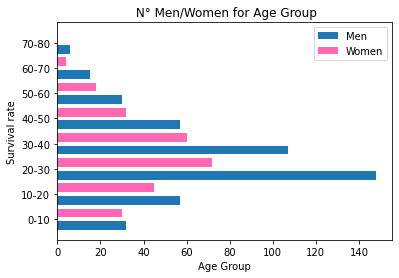

In [11]:
#creiamo un grafico per vede in valore assoluto quanti uomini e donne sono presenti per fasce d'età
labels = ["0-10","10-20","20-30","30-40","40-50", "50-60","60-70","70-80"]

men_means = male_df.groupby("AgeGroup").Survived.count()
women_means = female_df.groupby("AgeGroup").Survived.count()

x = np.arange(len(labels))  
width = 0.350 

fig, ax = plt.subplots()
rects1 = ax.barh(x - 0.5/2, men_means, width, label='Men')
rects2 = ax.barh(x + 0.5/2, women_means, width, label='Women',color='hotpink')


ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Survival rate')
ax.set_xlabel('Age Group')
ax.set_title(' N° Men/Women for Age Group')
ax.legend()

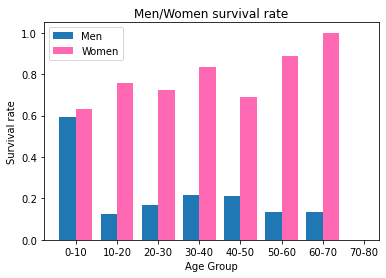

In [12]:
#e ora vediamo il tasso di sopravvivenza per fasce d'età
labels = ["0-10","10-20","20-30","30-40","40-50", "50-60","60-70","70-80"]
men_means = male_df.groupby("AgeGroup").Survived.mean()
women_means = female_df.groupby("AgeGroup").Survived.mean()

x = np.arange(len(labels))  
width = 0.40 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women',color='hotpink')


ax.set_ylabel('Survival rate')
ax.set_xlabel('Age Group')
ax.set_title('Men/Women survival rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [13]:
#si può facilemente notare che i bambini veniva salvati indipendentemente se fossero uomini o donne
#sopra i dieci anni però si può notare come la forbice di soppravvivenza tra uomini e donne si allarghi in fvore di quest'ultime

In [14]:
#analiziamo ora se c'è correlazione tra il numero di familiari presenti a bordo e la probabilità di sopravvivenza
#creiamo due dataframe
parents_df=df.loc[:,["Parch", "Survived","Age"]]
broth_df=df.loc[:,["SibSp", "Survived","Age"]]

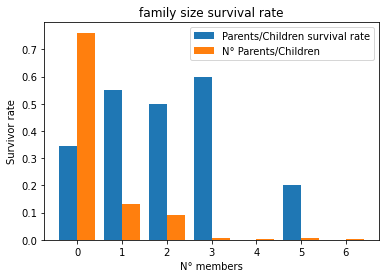

In [15]:
#analizziamo la correlazione tra la presenza di figli/genitori e la probabilità di sopravvivere
labels = sorted(parents_df.Parch.unique())


parents_mean = parents_df.groupby("Parch").Survived.mean()
parents_count = (parents_df.groupby("Parch").Survived.count())/max

x = np.arange(len(labels))  
width = 0.40 

fig, ax = plt.subplots()

rects1 = ax.bar(x-width/2, parents_mean, width, label='Parents/Children survival rate')
rects2 = ax.bar(x+width/2, parents_count, width, label='N° Parents/Children')



ax.set_ylabel('Survivor rate')
ax.set_xlabel("N° members")
ax.set_title('family size survival rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


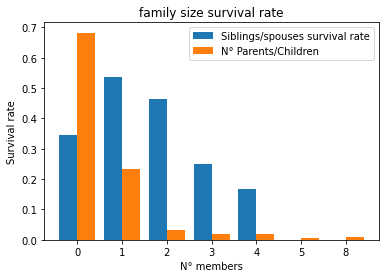

In [16]:
#e facciamo la stessa cosa per fratelli/coniugi
labels = sorted(broth_df.SibSp.unique())


broth_mean = broth_df.groupby("SibSp").Survived.mean()
broth_count = (broth_df.groupby("SibSp").Survived.count())/max

x = np.arange(len(labels))  
width = 0.40 
fig, ax = plt.subplots()

rects1 = ax.bar(x-width/2, broth_mean, width, label='Siblings/spouses survival rate')
rects2 = ax.bar(x+width/2, broth_count, width, label='N° Parents/Children')



ax.set_ylabel('Survival rate')
ax.set_xlabel("N° members")
ax.set_title('family size survival rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [17]:
#da quest grafici si possono notare due cose:
#la stragrande maggioranza dei passeggeri non aveva parenti a bordo
#il tasso di sopravvivenza aumenta per piccoli nuclei (1-2 parenti), per poi diminuire

In [18]:
#analizziamo ora la correlazione tra il tasso di sopravvivenza e la classe a bordo e la tariffa pagata

In [19]:
#creiamo un dataframe per la classe

class_df= df[["Survived", "Pclass"]]
class_df.head()


,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


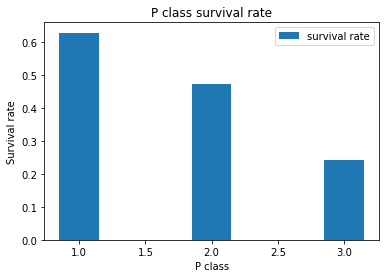

In [20]:
height=[1,2,3]
plt.bar(height,class_df.groupby('Pclass').Survived.mean(),0.3,label='survival rate')

plt.ylabel('Survival rate')
plt.xlabel("P class")
plt.title('P class survival rate')

plt.legend()


In [21]:
#analizziamo ora  la distrubizione delle tariffe pagate
#creiamo un dataframe
fare_df=df.loc[:,["Survived", "Fare"]]

In [22]:
fare_df.describe()


,Survived,Fare
count,891.000000,891.000000
mean,0.383838,32.204208
std,0.486592,49.693429
min,0.000000,0.000000
25%,0.000000,7.910400
50%,0.000000,14.454200
75%,1.000000,31.000000
max,1.000000,512.329200


Text(0.5, 1.0, 'distribution fare')

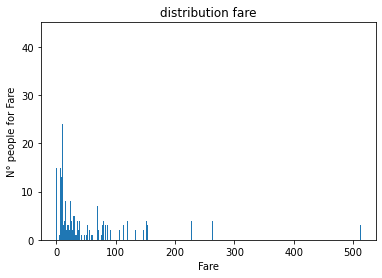

In [23]:
plt.bar(sorted(fare_df.Fare.unique()),fare_df.groupby('Fare').Survived.count())

plt.ylabel('N° people for Fare')
plt.xlabel("Fare")
plt.title('distribution fare')



In [24]:
#come abbiamo potuto osservare le persone in prima classe, quindi probabilmente quelle con tariffa maggiore hanno più probabilità di sopravvivenza
#e la distribuzione delle tarffe si concentra principalmente tra 0 e 100


In [25]:
#vediamo ora se ci può essere una correlazione dal luogo di imbarco e la distribuzione
embark_df=df.loc[:,["Survived", "Embarked","Fare"]]
embark_df.head()

,Survived,Embarked,Fare
0,0,S,7.2500
1,1,C,71.2833
2,1,S,7.9250
3,1,S,53.1000
4,0,S,8.0500


Text(0.5, 0, 'embarked from')

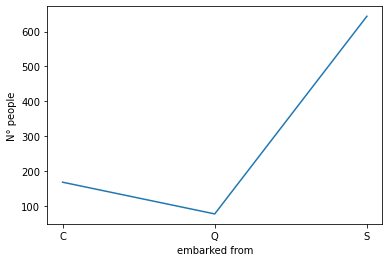

In [26]:
plt.plot(embark_df.groupby("Embarked")["Survived"].count())

plt.ylabel('N° people')
plt.xlabel("embarked from")



In [27]:
#notiamo che la maggior parte delle persone si sono imbarcate da souththempton
#per questo motivo inseriremo nei due valori mancanti di Embarked, il valore S


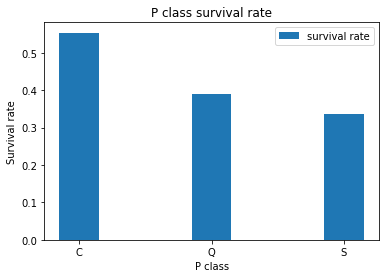

In [28]:
height=['C','Q','S']
plt.bar(height,embark_df.groupby('Embarked').Survived.mean(),0.3,label='survival rate')

plt.ylabel('Survival rate')
plt.xlabel("P class")
plt.title('P class survival rate')

plt.legend()

In [29]:
#RIEMPIAMO I VALORI NULLI DI ETA' E DELL'IMBARCO
# vediamo i vari titoli per ogni passeggero

#train

df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') 

pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r') 

#test
test_X['Initial']=0
for i in test_X:
    test_X['Initial']=test_X.Name.str.extract('([A-Za-z]+)\.') 
pd.crosstab(test_X.Initial,test_X.Sex).T.style.background_gradient(cmap='summer_r') 



Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [30]:
#uniamo i titoli marginali per diminuire il numero dei valori
#train
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
#test
test_X['Initial'].replace(['Col','Dona','Dr','Ms','Rev'],['Other','Mrs','Mr','Miss','Other'],inplace=True)

In [31]:
#calcoliamo la media dell'età
#uniamo il train e il test per calcolare la media delle età su più esempi
average_age=df.append(test_X)

average_age.groupby('Initial')["Age"].describe()


,count,mean,std,min,25%,50%,75%,max
Initial,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.00,4.0,9.0,14.5
Miss,214.0,21.834533,12.143736,0.17,15.25,22.0,30.0,63.0
Mr,593.0,32.545531,12.566598,11.00,23.00,30.0,40.0,80.0
Mrs,173.0,37.046243,12.820684,14.00,27.00,36.0,47.0,76.0
Other,13.0,44.923077,11.499721,27.00,38.00,47.0,54.0,60.0


In [32]:
#rimpiazziamo le età mancanti con la media dell'età per titolo
#train

df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=37
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=45

#test
test_X.loc[(test_X.Age.isnull())&(test_X.Initial=='Mr'),'Age']=33
test_X.loc[(test_X.Age.isnull())&(test_X.Initial=='Mrs'),'Age']=37
test_X.loc[(test_X.Age.isnull())&(test_X.Initial=='Master'),'Age']=5
test_X.loc[(test_X.Age.isnull())&(test_X.Initial=='Miss'),'Age']=22
test_X.loc[(test_X.Age.isnull())&(test_X.Initial=='Other'),'Age']=45

In [33]:
#controlliamo se ci sono valori nulli
df.Age.isnull().any()
test_X.Age.isnull().any()


False

In [34]:
#ora che non abbiamo più valori nuli in Age creiamo una colonna dove raggruppiamo l'età dei passegeri per decenni 
bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','10-20','20-30','30-40','40-50', "50-60","60-70","70-80"]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
test_X['AgeGroup'] = pd.cut(test_X['Age'], bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'Age category survival rate')

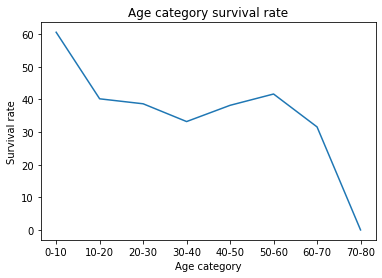

In [35]:
#vediamo ora graficamente il tasso di sopravvivenza per età raggruppata
g=df.groupby("AgeGroup")
d=g.mean()
y_age= d["Survived"]
x_age=["0-10","10-20","20-30","30-40","40-50", "50-60","60-70","70-80"]
y_age=y_age*100

plt.plot(x_age,y_age)

plt.ylabel('Survival rate')
plt.xlabel("Age category")
plt.title('Age category survival rate')

In [36]:
#rimpiazziamo i valori mancanti tra gli imbarcati con S data la grande maggioranza di imbarcati da Souththempton
df.loc[(df.Embarked.isnull()), 'Embarked']='S'

In [37]:
#vediamo se ci sono ancora valori nulli
df.Embarked.isnull().any()
test_X.Embarked.isnull().any()

False

In [38]:
#creiamo un altra colonna raggruppata per la grandezza dell famiglia sommando Parch e SibSp

#train
df["FamilySize"]= df["Parch"] + df["SibSp"]
df.groupby("FamilySize").mean()
#test
test_X["FamilySize"]= test_X["Parch"] + test_X["SibSp"]
test_X.groupby("FamilySize").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
FamilySize,,,,,,
0,1100.438735,2.383399,30.221344,0.000000,0.000000,22.862930
1,1090.243243,1.837838,35.166622,0.810811,0.189189,54.130408
2,1115.824561,2.228070,26.922456,0.929825,1.070175,44.918784
3,1109.571429,2.214286,21.863571,1.214286,1.785714,43.566371
4,1079.428571,2.142857,30.285714,1.714286,2.285714,127.152386
5,951.000000,1.666667,32.666667,2.666667,2.333333,185.041667
6,1122.250000,3.000000,24.000000,3.250000,2.750000,25.484375
7,1031.500000,3.000000,25.000000,3.000000,4.000000,46.900000
10,1205.750000,3.000000,26.625000,4.500000,5.500000,69.550000


In [39]:
#raggruppiamo i valori per il numero di parenti
#0=0,  1=1  ,2=2,  3=3-4, 4=5-6-7-8-9-10
bins= [0,1,2,4,5,11]
labels = ["0","1","2","3","4"]
df['Familysize'] = pd.cut(df['FamilySize'], bins=bins, labels=labels, right=False)
test_X['Familysize'] = pd.cut(test_X['FamilySize'], bins=bins, labels=labels, right=False)

In [40]:
df.groupby("Familysize").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Familysize,,,,,,,,
0,458.000000,0.303538,2.400372,31.992551,0.000000,0.000000,21.242689,0.000000
1,412.838509,0.552795,1.919255,31.611304,0.763975,0.236025,49.894129,1.000000
2,462.961832,0.610687,2.190840,24.318702,0.977099,1.244275,43.051176,2.221374
3,367.866667,0.200000,2.666667,20.000000,2.133333,1.866667,58.094453,4.000000
4,400.148936,0.148936,2.808511,18.106383,3.893617,2.361702,58.352128,6.255319


In [41]:
#ora raggruppiamo il fare per 6 categorie 
df["FareCategory"]= pd.qcut(df["Fare"],6)
test_X["FareCategory"]= pd.qcut(test_X["Fare"],6)

Text(0.5, 1.0, 'Fare category survival rate')

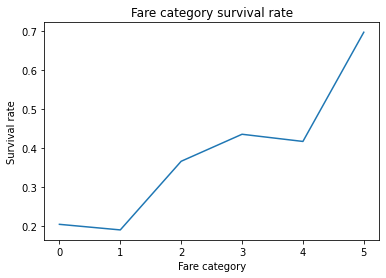

In [42]:
#vediamo graficamente la correlazione tra tasso di sopravvivenza e la tariffa pagata
plt.plot(df.groupby(["FareCategory"]).mean()["Survived"])

plt.ylabel('Survival rate')
plt.xlabel("Fare category")
plt.title('Fare category survival rate')

In [43]:
#rendiamo le variabili sex, embarked, AgeGroup, FareCategory e initial numeriche, per poterle usare nei nostri modelli
#per il train set...
# parch category dove: 0= non è un figlio o un genitore, 1=figlio, 2=genitore
#assumiamo che sopra i 21 anni una persona diventa genitore se Parch è maggiore di 1, figlio se l'età è minore di 21
df["Parch_cat"]=0
df.loc[(df['Parch']==0),'Parch_cat']=0
df.loc[(df['Parch']>0) & (df["Age"]<21),'Parch_cat']=1
df.loc[(df['Parch']>0) & (df["Age"]>=21),'Parch_cat']=2

#maschio=0, femmina=1
df["Sex_cat"]=0
df.loc[(df.Sex=='male'),'Sex_cat']=0
df.loc[(df.Sex=='female'),'Sex_cat']=1

#souththempton=0,  Cherbourg=1, Queenstown=2
df["Embarked_cat"]=0
df.loc[(df.Embarked=='S'),'Embarked_cat']=0
df.loc[(df.Embarked=='C'),'Embarked_cat']=1
df.loc[(df.Embarked=='Q'),'Embarked_cat']=2
#creiamo anche una categoria per titolo della persona
#Mr=0, Mrs=1, Miss=2, Master=3, other=4
df["Initial_cat"]=0
df.loc[(df.Initial=='Mr'),'Initial_cat']=0
df.loc[(df.Initial=='Mrs'),'Initial_cat']=1
df.loc[(df.Initial=='Miss'),'Initial_cat']=2
df.loc[(df.Initial=='Master'),'Initial_cat']=3
df.loc[(df.Initial=='Other'),'Initial_cat']=4

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initial,AgeGroup,FamilySize,Familysize,FareCategory,Parch_cat,Sex_cat,Embarked_cat,Initial_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,20-30,1,1,"(-0.001, 7.775]",0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,30-40,1,1,"(52.369, 512.329]",0,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,20-30,0,0,"(7.775, 8.662]",0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,30-40,1,1,"(52.369, 512.329]",0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,30-40,0,0,"(7.775, 8.662]",0,0,0,0


In [44]:

df["AgeCategory"]=0
df.loc[(df.AgeGroup=='0-10'),'AgeCategory']=0
df.loc[(df.AgeGroup=='10-20'),'AgeCategory']=1
df.loc[(df.AgeGroup=='20-30'),'AgeCategory']=2
df.loc[(df.AgeGroup=='30-40'),'AgeCategory']=3
df.loc[(df.AgeGroup=='40-50'),'AgeCategory']=4
df.loc[(df.AgeGroup=='50-60'),'AgeCategory']=5
df.loc[(df.AgeGroup=='60-70'),'AgeCategory']=6
df.loc[(df.AgeGroup=='70-80'),'AgeCategory']=7

df["FareCategory"]=0
df.loc[df['Fare']<=7.775,'FareCategory']=0
df.loc[(df['Fare']>7.775)&(df['Fare']<=8.662),'FareCategory']=1
df.loc[(df['Fare']>8.662)&(df['Fare']<=14.454),'FareCategory']=2
df.loc[(df['Fare']>14.454)&(df['Fare']<=26.0),'FareCategory']=3
df.loc[(df['Fare']>26.0)&(df['Fare']<=52.369),'FareCategory']=4
df.loc[df['Fare']>52.369,'FareCategory']=5

In [45]:
#facciamo ora la stessa cosa per il test set

test_X["Parch_cat"]=0
test_X.loc[(test_X['Parch']==0),'Parch_cat']=0
test_X.loc[(test_X['Parch']>0) & (test_X["Age"]<21),'Parch_cat']=1
test_X.loc[(test_X['Parch']>0) & (test_X["Age"]>=21),'Parch_cat']=2

test_X["Sex_cat"]=0
test_X.loc[(test_X.Sex=='male'),'Sex_cat']=0
test_X.loc[(test_X.Sex=='female'),'Sex_cat']=1

test_X["Embarked_cat"]=0
test_X.loc[(test_X.Embarked=='S'),'Embarked_cat']=0
test_X.loc[(test_X.Embarked=='C'),'Embarked_cat']=1
test_X.loc[(test_X.Embarked=='Q'),'Embarked_cat']=2

test_X["Initial_cat"]=0
test_X.loc[(test_X.Initial=='Mr'),'Initial_cat']=0
test_X.loc[(test_X.Initial=='Mrs'),'Initial_cat']=1
test_X.loc[(test_X.Initial=='Miss'),'Initial_cat']=2
test_X.loc[(test_X.Initial=='Master'),'Initial_cat']=3
test_X.loc[(test_X.Initial=='Other'),'Initial_cat']=4

test_X["AgeCategory"]=0
test_X.loc[(test_X.AgeGroup=='0-10'),'AgeCategory']=0
test_X.loc[(test_X.AgeGroup=='10-20'),'AgeCategory']=1
test_X.loc[(test_X.AgeGroup=='20-30'),'AgeCategory']=2
test_X.loc[(test_X.AgeGroup=='30-40'),'AgeCategory']=3
test_X.loc[(test_X.AgeGroup=='40-50'),'AgeCategory']=4
test_X.loc[(test_X.AgeGroup=='50-60'),'AgeCategory']=5
test_X.loc[(test_X.AgeGroup=='60-70'),'AgeCategory']=6
test_X.loc[(test_X.AgeGroup=='70-80'),'AgeCategory']=7

test_X["FareCategory"]=0
test_X.loc[test_X['Fare']<=7.775,'FareCategory']=0
test_X.loc[(test_X['Fare']>7.775)&(df['Fare']<=8.662),'FareCategory']=1
test_X.loc[(test_X['Fare']>8.662)&(df['Fare']<=14.454),'FareCategory']=2
test_X.loc[(test_X['Fare']>14.454)&(df['Fare']<=26.0),'FareCategory']=3
test_X.loc[(test_X['Fare']>26.0)&(df['Fare']<=52.369),'FareCategory']=4
test_X.loc[test_X['Fare']>52.369,'FareCategory']=5


In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Initial,AgeGroup,FamilySize,Familysize,FareCategory,Parch_cat,Sex_cat,Embarked_cat,Initial_cat,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,20-30,1,1,0,0,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,30-40,1,1,5,0,1,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,20-30,0,0,1,0,1,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,30-40,1,1,5,0,1,0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,30-40,0,0,1,0,0,0,0,3


In [47]:
#droppiamo le variabili che non useremo per i modelli

df.drop(["PassengerId","Name","Age","SibSp","Parch","Ticket","Fare","Cabin","Familysize","AgeGroup","Sex","Embarked","Initial"], axis=1 ,inplace=True)
df.head()

,Survived,Pclass,FamilySize,FareCategory,Parch_cat,Sex_cat,Embarked_cat,Initial_cat,AgeCategory
0,0,3,1,0,0,0,0,0,2
1,1,1,1,5,0,1,1,1,3
2,1,3,0,1,0,1,0,2,2
3,1,1,1,5,0,1,0,1,3
4,0,3,0,1,0,0,0,0,3


In [48]:
#salviamo PassengerID del test set prima di dropparlo, per poter fare la submit in Kagle
id_test_X=test_X["PassengerId"]
test_X.drop(["PassengerId","Name","Age","SibSp","Parch","Ticket","Fare","Cabin","Familysize","AgeGroup","Sex","Embarked","Initial"], axis=1 ,inplace=True)
test_X.head()

,Pclass,FamilySize,FareCategory,Parch_cat,Sex_cat,Embarked_cat,Initial_cat,AgeCategory
0,3,0,1,0,0,2,0,3
1,3,1,0,0,1,0,1,4
2,2,0,2,0,0,2,0,6
3,3,0,0,0,0,0,0,2
4,3,2,2,2,1,0,1,2


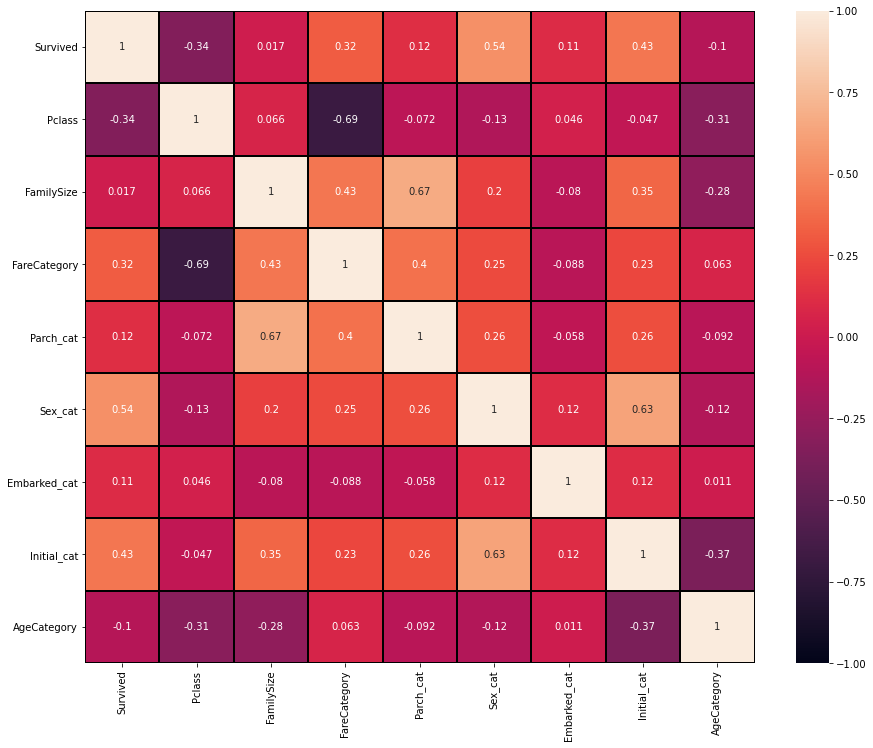

In [49]:
#vediamo le correlazioni tra le variabili rimaste
import seaborn as sns

sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()


In [50]:
#prima di predire il test set facciamo delle prove splittando il train set 0.7 come train, 0.3 come test set
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])

In [51]:
#creiamo le variabili trai e test
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

X=df[df.columns[1:]]
Y=df[df.columns[:1]]

X_test= test[test.columns[1:]]
Y_test= test[test.columns[:1]]

In [52]:
#importiamo dei koduli che ci saranno utili per creare i vari modelli di machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

The accuracy of the NaiveBayes model is			 0.8246268656716418


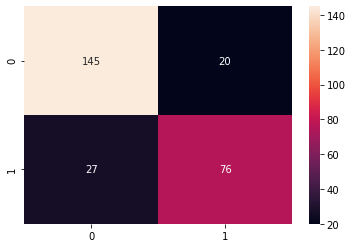

In [53]:
#NAIVE BAYES

gnb = GaussianNB()
gnb.fit(train_X,train_Y.values.ravel())
NB_prediction=gnb.predict(X_test)
print('The accuracy of the NaiveBayes model is\t\t\t',metrics.accuracy_score(NB_prediction,Y_test['Survived']))

sns.heatmap(confusion_matrix(Y_test["Survived"],NB_prediction),annot=True,fmt='2.0f')

The accuracy of the MLP model is			 0.8022388059701493


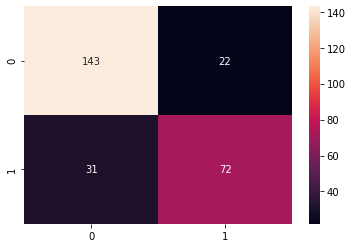

In [54]:
#model MlP
modelMLP=MLPClassifier(max_iter=600, random_state=1)
modelMLP.fit(train_X, train_Y.values.ravel())
MLP_prediction= modelMLP.predict(X_test)
print("The accuracy of the MLP model is\t\t\t",metrics.accuracy_score(MLP_prediction,Y_test["Survived"]))

sns.heatmap(confusion_matrix(Y_test["Survived"],MLP_prediction),annot=True,fmt='2.0f')

The accuracy of the Logistic Regression model is 	 0.8283582089552238


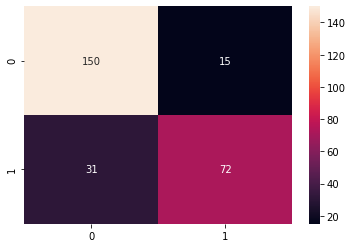

In [55]:
# Logistic Regression
modelLG = LogisticRegression(C=0.75,solver='liblinear')
modelLG.fit(train_X,train_Y.values.ravel())
LR_prediction=modelLG.predict(X_test)
print('The accuracy of the Logistic Regression model is \t',metrics.accuracy_score(LR_prediction,Y_test['Survived']))

sns.heatmap(confusion_matrix(Y_test["Survived"],LR_prediction),annot=True,fmt='2.0f')



The accuracy of the Decision Tree is 			 0.8059701492537313


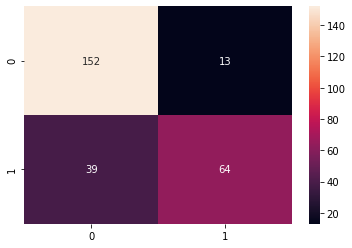

In [56]:
# Decision Tree
modelDT=DecisionTreeClassifier()
modelDT.fit(train_X,train_Y)
DT_prediction=modelDT.predict(X_test)
print('The accuracy of the Decision Tree is \t\t\t',metrics.accuracy_score(DT_prediction,Y_test['Survived']))

sns.heatmap(confusion_matrix(Y_test["Survived"],DT_prediction),annot=True,fmt='2.0f')


The accuracy of the Random Forests model is 		 0.8208955223880597


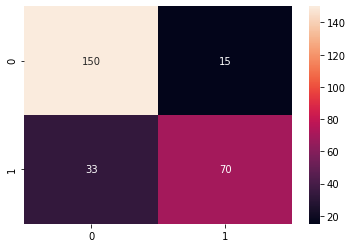

In [57]:

# Random Forest
modelRF=RandomForestClassifier(n_estimators=300)
modelRF.fit(train_X,train_Y.values.ravel())
RF_prediction=modelRF.predict(X_test)
print('The accuracy of the Random Forests model is \t\t',metrics.accuracy_score(RF_prediction,Y_test['Survived']))

sns.heatmap(confusion_matrix(Y_test["Survived"],RF_prediction),annot=True,fmt='2.0f')


The accuracy of the Ensemble is 			 0.8059701492537313


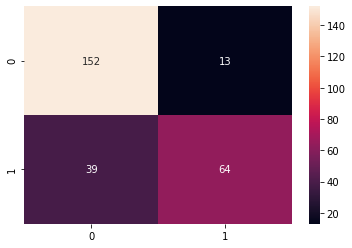

In [58]:
#proviamo ad unire i modelli per crearne uno migliore tramite il voting classifier
from sklearn.ensemble import VotingClassifier

Ensemble_Model_For_Prediction=VotingClassifier(estimators=[                                     
                                       ('RFor',RandomForestClassifier(n_estimators=300,random_state=0)),
                                       ('LR',LogisticRegression(C=0.75,solver='liblinear')),
                                       ('DT',DecisionTreeClassifier(random_state=0)),
                                       ('NB',GaussianNB()),
                                       ('MLP',MLPClassifier(max_iter=600, random_state=1))
                                             ], 
                       voting='soft')
Ensemble_Model_For_Prediction.fit(train_X,train_Y.values.ravel())
ensemble_prediction= Ensemble_Model_For_Prediction.predict(X_test)

print('The accuracy of the Ensemble is \t\t\t',metrics.accuracy_score(DT_prediction,Y_test['Survived']))

sns.heatmap(confusion_matrix(Y_test["Survived"],DT_prediction),annot=True,fmt='2.0f')

In [59]:
#ora usiamo tutto il train set per allenare il modello e fare la predizione per il test set
#creiamo due variabili per il train che serviranno per allenare il modello
X_train=df[df.columns[1:]]
Y_train=df[df.columns[:1]]

In [60]:
#NAIVE BAYES

gnb = GaussianNB()
gnb.fit(X_train,Y_train.values.ravel())
NB_prediction=gnb.predict(test_X)

In [61]:
modelMLP=MLPClassifier(max_iter=600, random_state=1)
modelMLP.fit(X_train, Y_train.values.ravel())
MLP_prediction= modelMLP.predict(test_X)


In [62]:
# Logistic Regression
modelLG = LogisticRegression(C=0.75,solver='liblinear')
modelLG.fit(X_train,Y_train.values.ravel())
LR_prediction=modelLG.predict(test_X)



In [63]:
# Decision Tree
modelDT=DecisionTreeClassifier()
modelDT.fit(X_train,Y_train)
DT_prediction=modelDT.predict(test_X)


In [64]:
# Random Forest
modelRF=RandomForestClassifier(n_estimators=300, max_features=None)
modelRF.fit(X_train,Y_train.values.ravel())
RF_prediction=modelRF.predict(test_X)

In [65]:
Ensemble_Model_For_Prediction=VotingClassifier(estimators=[                                     
                                       ('RFor',RandomForestClassifier(n_estimators=300,random_state=0)),
                                       ('LR',LogisticRegression(C=0.75,solver='liblinear')),
                                       ('DT',DecisionTreeClassifier(random_state=0)),
                                       ('NB',GaussianNB()),
                                       ('MLP',MLPClassifier(max_iter=600, random_state=1))
                                             ], 
                       voting='soft')
Ensemble_Model_For_Prediction.fit(X_train,Y_train.values.ravel())
ensemble_prediction= Ensemble_Model_For_Prediction.predict(test_X)



In [66]:
#Ora creiamo i file csv per fare la submit su kagle della predizione del test set

In [67]:
# Predict
test_Survived = pd.Series(NB_prediction, name="Survived")
results = pd.concat([id_test_X,test_Survived],axis=1)
results.to_csv("predictionsNB.csv",index=False)

In [68]:
# Predict
test_Survived = pd.Series(MLP_prediction, name="Survived")
results = pd.concat([id_test_X,test_Survived],axis=1)
results.to_csv("predictionsMLP.csv",index=False)

In [69]:
# Predict
test_Survived = pd.Series(LR_prediction, name="Survived")
results = pd.concat([id_test_X,test_Survived],axis=1)
results.to_csv("predictionsLR.csv",index=False)

In [70]:
# Predict
test_Survived = pd.Series(DT_prediction, name="Survived")
results = pd.concat([id_test_X,test_Survived],axis=1)
results.to_csv("predictionsDT.csv",index=False)

In [71]:
# Predict
test_Survived = pd.Series(RF_prediction, name="Survived")
results = pd.concat([id_test_X,test_Survived],axis=1)
results.to_csv("predictionsRF.csv",index=False)

In [72]:
# Predict
test_Survived = pd.Series(ensemble_prediction, name="Survived")
results = pd.concat([id_test_X,test_Survived],axis=1)
results.to_csv("predictionsE.csv",index=False)
